RESEARCH QUESTIONS:
1. What is the overall sales trend?
2. What are the top 3 products by sales?
3. What are the top 3 selling products?
4. What is the most and least porfitable country?
5. What are the Most Profitable Segment and Least Profitable Segment?   
6. What is the highest and least product sold?  

In [758]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import seaborn as sns

In [759]:
df = pd.read_csv(r"C:\DATA ANALYSIS\EXCEL\sales_data.csv", low_memory=False)

In [760]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Unnamed: 15,Unnamed: 16
0,Government,Canada,Carretera,NaN,1619.0,$3.00,$20,"$32,370","$32,370","$16,185","$16,185",1/1/2019,1.0,Jan,2019.0,NaN,NaN
1,Government,Germany,Carretera,NaN,1321.0,$3.00,$20,"$26,420","$26,420","$13,210","$13,210",1/1/2019,1.0,Jan,2019.0,NaN,NaN
2,Midmarket,France,Carretera,NaN,2178.0,$3.00,$15,"$32,670","$32,670","$21,780","$10,890",6/1/2019,6.0,Jun,2019.0,NaN,NaN
3,Midmarket,Germany,Carretera,NaN,888.0,$3.00,$15,"$13,320","$13,320","$8,880","$4,440",6/1/2019,6.0,Jun,2019.0,NaN,NaN
4,Midmarket,Mexico,Carretera,NaN,2470.0,$3.00,$15,"$37,050","$37,050","$24,700","$12,350",6/1/2019,6.0,Jun,2019.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,$-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,$-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,$-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,$-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [761]:
df1 = df.drop_duplicates()
df1
 

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Unnamed: 15,Unnamed: 16
0,Government,Canada,Carretera,NaN,1619.0,$3.00,$20,"$32,370","$32,370","$16,185","$16,185",1/1/2019,1.0,Jan,2019.0,NaN,NaN
1,Government,Germany,Carretera,NaN,1321.0,$3.00,$20,"$26,420","$26,420","$13,210","$13,210",1/1/2019,1.0,Jan,2019.0,NaN,NaN
2,Midmarket,France,Carretera,NaN,2178.0,$3.00,$15,"$32,670","$32,670","$21,780","$10,890",6/1/2019,6.0,Jun,2019.0,NaN,NaN
3,Midmarket,Germany,Carretera,NaN,888.0,$3.00,$15,"$13,320","$13,320","$8,880","$4,440",6/1/2019,6.0,Jun,2019.0,NaN,NaN
4,Midmarket,Mexico,Carretera,NaN,2470.0,$3.00,$15,"$37,050","$37,050","$24,700","$12,350",6/1/2019,6.0,Jun,2019.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Small Business,Mexico,Amarilla,High,546.0,$260.00,$300,"$163,800","$139,230","$136,500","$2,730",10/1/2019,10.0,Oct,2019.0,NaN,NaN
697,Government,Mexico,Montana,High,1368.0,$5.00,$7,"$9,576","$8,140","$6,840","$1,300",2/1/2019,2.0,Feb,2019.0,NaN,NaN
698,Government,Canada,Paseo,High,723.0,$10.00,$7,"$5,061","$4,302","$3,615",$687,4/1/2019,4.0,Apr,2019.0,NaN,NaN
699,Channel Partners,USA,VTT,High,1806.0,$250.00,$12,"$21,672","$18,421","$5,418","$13,003",5/1/2019,5.0,May,2019.0,NaN,NaN


In [762]:
df1[' Manufacturing Price '] = df1[' Manufacturing Price '].str.replace('$', '')
df1['  Sales '] =  df1['  Sales '].str.replace('$', '')
df1[' COGS '] = df1[' COGS '].str.replace('$', '')
df1[' Gross Sales '] = df1[' Gross Sales '].str.replace('$', '')
df1[' Profit '] = df1[' Profit '].str.replace('$', '')
df1[' Sale Price '] = df1[' Sale Price '].str.replace('$', '')

df1


C:\Users\bonnie\AppData\Local\Temp\ipykernel_4880\1374472393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[' Manufacturing Price '] = df1[' Manufacturing Price '].str.replace('$', '')
C:\Users\bonnie\AppData\Local\Temp\ipykernel_4880\1374472393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['  Sales '] =  df1['  Sales '].str.replace('$', '')
C:\Users\bonnie\AppData\Local\Temp\ipykernel_4880\1374472393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Unnamed: 15,Unnamed: 16
0,Government,Canada,Carretera,NaN,1619.0,3.00,20,"32,370","32,370","16,185","16,185",1/1/2019,1.0,Jan,2019.0,NaN,NaN
1,Government,Germany,Carretera,NaN,1321.0,3.00,20,"26,420","26,420","13,210","13,210",1/1/2019,1.0,Jan,2019.0,NaN,NaN
2,Midmarket,France,Carretera,NaN,2178.0,3.00,15,"32,670","32,670","21,780","10,890",6/1/2019,6.0,Jun,2019.0,NaN,NaN
3,Midmarket,Germany,Carretera,NaN,888.0,3.00,15,"13,320","13,320","8,880","4,440",6/1/2019,6.0,Jun,2019.0,NaN,NaN
4,Midmarket,Mexico,Carretera,NaN,2470.0,3.00,15,"37,050","37,050","24,700","12,350",6/1/2019,6.0,Jun,2019.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Small Business,Mexico,Amarilla,High,546.0,260.00,300,"163,800","139,230","136,500","2,730",10/1/2019,10.0,Oct,2019.0,NaN,NaN
697,Government,Mexico,Montana,High,1368.0,5.00,7,"9,576","8,140","6,840","1,300",2/1/2019,2.0,Feb,2019.0,NaN,NaN
698,Government,Canada,Paseo,High,723.0,10.00,7,"5,061","4,302","3,615",687,4/1/2019,4.0,Apr,2019.0,NaN,NaN
699,Channel Partners,USA,VTT,High,1806.0,250.00,12,"21,672","18,421","5,418","13,003",5/1/2019,5.0,May,2019.0,NaN,NaN


In [763]:
df2 = df1.drop([700])

df3 = df2.drop(columns=["Unnamed: 15", "Unnamed: 16",  "Month Number", "Month Name", "Year"])

df3 = df3.dropna(subset='Discount Band', inplace=False)

df3

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Sales,COGS,Profit,Date
53,Government,France,Paseo,Low,3945.0,10.00,7,"27,615","27,339","19,725","7,614",1/1/2019
54,Midmarket,France,Paseo,Low,2296.0,10.00,15,"34,440","34,096","22,960","11,136",2/1/2019
55,Government,France,Paseo,Low,1030.0,10.00,7,"7,210","7,138","5,150","1,988",5/1/2019
56,Government,France,Velo,Low,639.0,120.00,7,"4,473","4,428","3,195","1,233",11/1/2019
57,Government,Canada,VTT,Low,1326.0,250.00,7,"9,282","9,189","6,630","2,559",3/1/2019
...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.00,300,"742,500","631,125","618,750","12,375",3/1/2019
696,Small Business,Mexico,Amarilla,High,546.0,260.00,300,"163,800","139,230","136,500","2,730",10/1/2019
697,Government,Mexico,Montana,High,1368.0,5.00,7,"9,576","8,140","6,840","1,300",2/1/2019
698,Government,Canada,Paseo,High,723.0,10.00,7,"5,061","4,302","3,615",687,4/1/2019


In [764]:
df3['Units Sold'] =  df3['Units Sold'].astype(int)

df3['Segment'] =  df3['Segment'].astype(str)

df3['Country'] =  df3['Country'].astype(str)

df3['Product'] =  df3['Product'].astype(str)

df3['Discount Band'] =  df3['Discount Band'].astype(str)

df3[' Manufacturing Price '] =  df3[' Manufacturing Price '].astype(float)

df3[' Sale Price '] =  df3[' Sale Price '].astype(float)






In [765]:

df3[' Gross Sales '] = df3[' Gross Sales '].str.replace(',', '')
df3[' Gross Sales '] =  df3[' Gross Sales '].astype(float)


df3['  Sales '] =  df3['  Sales '].str.replace(',', '')
df3['  Sales '] =  df3['  Sales '].astype(float)


df3[' COGS '] =  df3[' COGS '].str.replace(',', '')
df3[' COGS '] =  df3[' COGS '].astype(float)

df3[' Profit '] =  df3[' Profit '].str.replace(',', '')
df3[' Profit '] =  pd.to_numeric(df3[' Profit '], errors='coerce')

df3['Date'] =  pd.to_datetime(df3['Date'])






In [766]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647 entries, 53 to 699
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Segment                647 non-null    object        
 1   Country                647 non-null    object        
 2   Product                647 non-null    object        
 3   Discount Band          647 non-null    object        
 4   Units Sold             647 non-null    int32         
 5    Manufacturing Price   647 non-null    float64       
 6    Sale Price            647 non-null    float64       
 7    Gross Sales           647 non-null    float64       
 8     Sales                647 non-null    float64       
 9    COGS                  647 non-null    float64       
 10   Profit                584 non-null    float64       
 11  Date                   647 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int32(1), object(4)
memory usage: 

- <h4> Overall Sales Trend

In [767]:
# df3['Date'].min()

In [768]:
# df3['Date'].max()

In [769]:
df_Trend = df3.groupby('Date').sum()['  Sales '].reset_index()


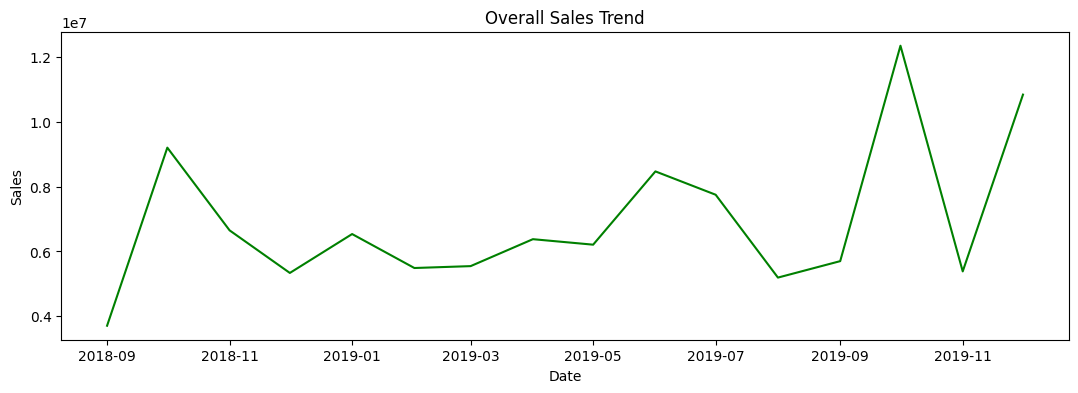

In [770]:
plt.figure(figsize=(13,4))
plt.plot(df_Trend['Date'], df_Trend['  Sales '], color='Green')
plt.xlabel('Date')
plt.ylabel('Sales',)
plt.title('Overall Sales Trend')
plt.show()


- <h4> Top 3 products by Sales

In [771]:
df_Top_product = pd.DataFrame([df3['Product'], df3['  Sales ']]).transpose()
df_Top_product = df_Top_product.groupby('Product').sum()['  Sales ']


In [772]:
df_Top_product = df_Top_product.sort_values(ascending=False).reset_index()




In [773]:
df_Top_product[:3]

,Product,Sales
0,Paseo,31095222.0
1,VTT,18615492.0
2,Velo,17221793.0


- <h4> Most Top 3 selling Products

In [774]:
df_Top_product_sell = pd.DataFrame([df3['Product'],df3['Units Sold']]).transpose()
df_Top_product_sell = df_Top_product_sell.groupby('Product').sum()['Units Sold']

In [775]:
df_Top_product_sell = df_Top_product_sell.sort_values(ascending=False).reset_index()


In [776]:
df_Top_product_sell[:3]

,Product,Units Sold
0,Paseo,319132
1,VTT,155387
2,Velo,151251


- <h4>The most and least profitable country

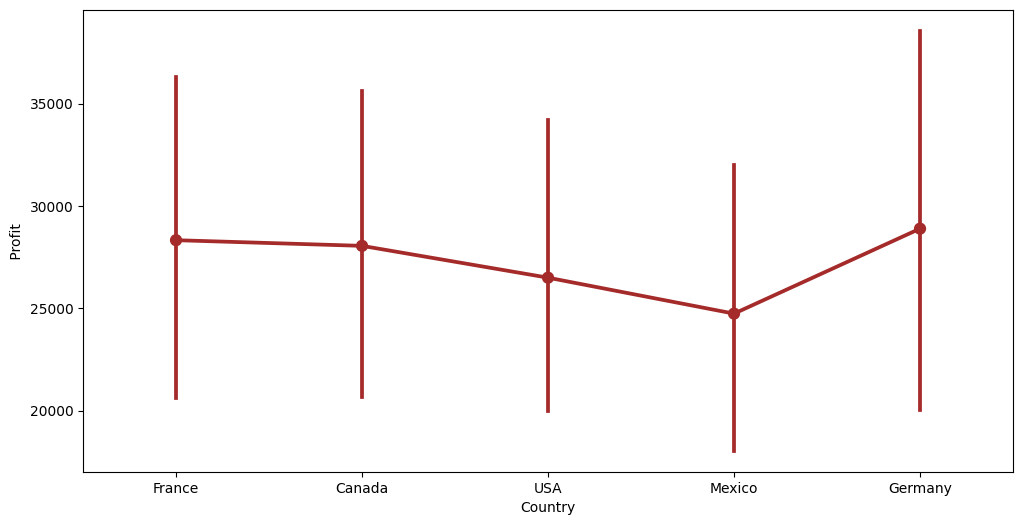

In [777]:
plt.figure(figsize=(12,6))
sns.pointplot(data=df3,  x='Country', y=' Profit ', color='brown')
plt.show()

- <h4> Most Profitable Segment and Least Profitable Segment

c:\DATA ANALYSIS\PYTHON\python_basics\projectEnv\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\DATA ANALYSIS\PYTHON\python_basics\projectEnv\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\DATA ANALYSIS\PYTHON\python_basics\projectEnv\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\DATA ANALYSIS\PYTHON\python_basics\projectEnv\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\DATA 

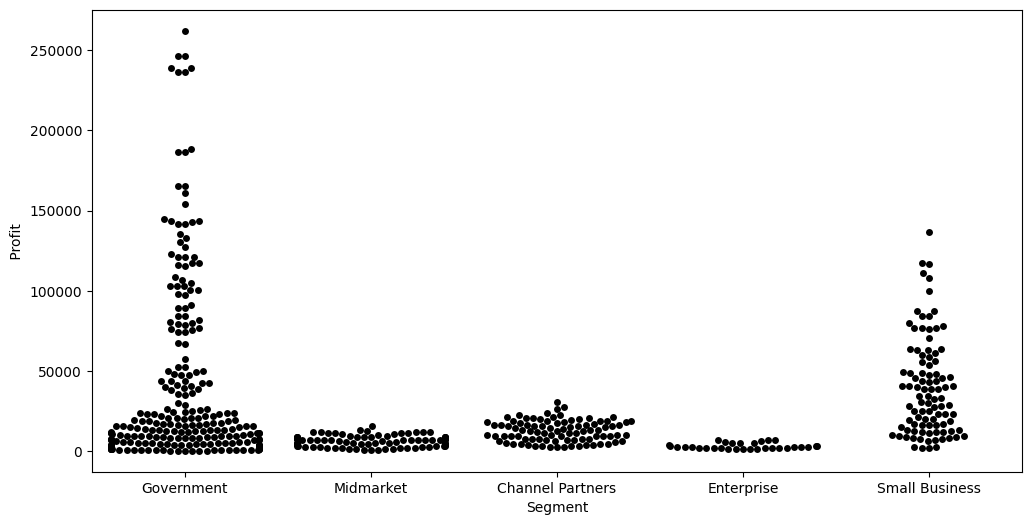

In [778]:
plt.figure(figsize=(12,6))

sns.swarmplot(data=df3, x='Segment', y=' Profit ', color='black')

plt.show()

- <h4> Highest and least product sold? 

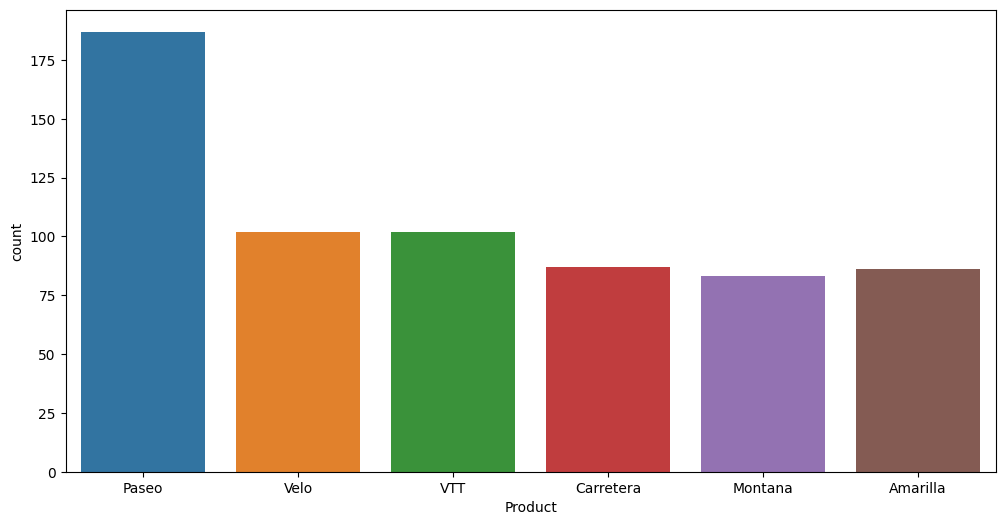

In [779]:
plt.figure(figsize=(12,6))

sns.countplot(data=df3,  x='Product')
plt.show()